In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

*** 

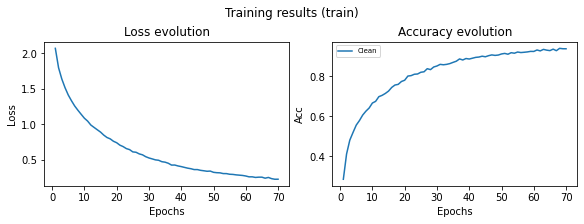

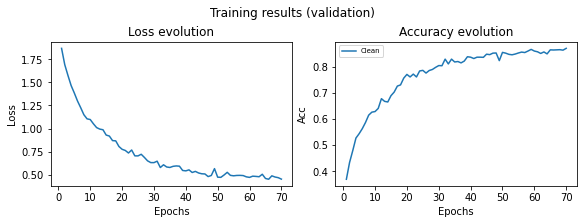

In [2]:
state_dirs = ["train_params\\silent\\silent_70.pt",
            #   "train_params\\filter\\filter_100.pt",
            #   "train_params\\gaussian\\gaussian_100.pt",
            #   "train_params\\permute\\permute_100.pt",
            #   "train_params\\silent\\silent_100.pt",
              # "/content/gdrive/MyDrive/VGG/linear_params/VGGLinear_state.pt",
              ]

n_curves = len(state_dirs)

states = []
for i in range(n_curves):
    states.append(torch.load(state_dirs[i]))

labels =["Clean",
         "Filter",
         "Gaussian Noise",
         "Window permutation",
         "Random Silence",
        ]

fig, (train_loss,train_acc) = plt.subplots(ncols = 2, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (train)")

for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1, 1)
    train_loss.plot(n_epochs , [e.item() for e in state["loss"][0]], label = labels[i])
    train_acc.plot(n_epochs , state["acc"][0], label = labels[i])

train_loss.set_xlabel("Epochs")
train_loss.set_ylabel("Loss")
train_loss.set_title("Loss evolution")

train_acc.set_xlabel("Epochs")
train_acc.set_ylabel("Acc")
train_acc.set_title("Accuracy evolution")

plt.legend(fontsize = "x-small")
plt.plot()
plt.savefig("audioplot_train.pdf")

fig, (val_loss,val_acc) = plt.subplots(ncols = 2, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (validation)")

for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1 ,1)
    val_loss.plot(n_epochs , [e.item() for e in state["loss"][1]], label = labels[i])
    val_acc.plot(n_epochs , state["acc"][1], label = labels[i])

val_loss.set_xlabel("Epochs")
val_loss.set_ylabel("Loss")
val_loss.set_title("Loss evolution")

val_acc.set_xlabel("Epochs")
val_acc.set_ylabel("Acc")
val_acc.set_title("Accuracy evolution")

plt.legend(fontsize = "x-small")
plt.plot() 
plt.savefig("audioplot_val.pdf")

***

In [4]:
for i, state in enumerate(states):
    print(labels[i])
    # pos = np.argmin([e.item() for e in state["loss"][1]])
    t = state["acc"][0][-1] * 100
    v = state["acc"][1][-1]* 100
    print(f"Train acc {t}")
    print(f"Val acc {v}") 

Clean
Train acc 93.65783822476736
Val acc 86.949055523755
